In [13]:
import pandas as pd
from gensim.models import FastText
from gensim.test.utils import datapath
from gensim.models.callbacks import CallbackAny2Vec
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
class EpochLogger(CallbackAny2Vec):

    '''Callback to log information about training'''


    def __init__(self):
        self.epoch = 0


    def on_epoch_begin(self, model):
        print("Epoch #{} start".format(self.epoch))


    def on_epoch_end(self, model):
        print("Epoch #{} end".format(self.epoch))
        self.epoch += 1

In [5]:
model = FastText(min_count=1, vector_size=100, sg=0, corpus_file = datapath("/content/gdrive/MyDrive/malware-corpus.txt"), epochs=50, callbacks=[EpochLogger()])


Epoch #0 start
Epoch #0 end
Epoch #1 start
Epoch #1 end
Epoch #2 start
Epoch #2 end
Epoch #3 start
Epoch #3 end
Epoch #4 start
Epoch #4 end
Epoch #5 start
Epoch #5 end
Epoch #6 start
Epoch #6 end
Epoch #7 start
Epoch #7 end
Epoch #8 start
Epoch #8 end
Epoch #9 start
Epoch #9 end
Epoch #10 start
Epoch #10 end
Epoch #11 start
Epoch #11 end
Epoch #12 start
Epoch #12 end
Epoch #13 start
Epoch #13 end
Epoch #14 start
Epoch #14 end
Epoch #15 start
Epoch #15 end
Epoch #16 start
Epoch #16 end
Epoch #17 start
Epoch #17 end
Epoch #18 start
Epoch #18 end
Epoch #19 start
Epoch #19 end
Epoch #20 start
Epoch #20 end
Epoch #21 start
Epoch #21 end
Epoch #22 start
Epoch #22 end
Epoch #23 start
Epoch #23 end
Epoch #24 start
Epoch #24 end
Epoch #25 start
Epoch #25 end
Epoch #26 start
Epoch #26 end
Epoch #27 start
Epoch #27 end
Epoch #28 start
Epoch #28 end
Epoch #29 start
Epoch #29 end
Epoch #30 start
Epoch #30 end
Epoch #31 start
Epoch #31 end
Epoch #32 start
Epoch #32 end
Epoch #33 start
Epoch #33 end


In [7]:
model.save("/content/gdrive/My Drive/fast_text-malware.bin")
model = FastText.load("/content/gdrive/My Drive/fast_text-malware.bin")

In [8]:
model.wv.most_similar("push")[:5]

[('call', 0.9248364567756653),
 ('Push', 0.8046486377716064),
 ("call\\n'", 0.6130177974700928),
 ('pop', 0.573036789894104),
 ('retn', 0.5565561652183533)]

In [9]:
model.wv.most_similar("mov")[:5]

[('Std', 0.3800610303878784),
 ('std', 0.30256927013397217),
 ('add', 0.2862606346607208),
 ('sub', 0.26875928044319153),
 ('Push', 0.2564126253128052)]

In [10]:
model.wv.most_similar("add")[:5]

[('sub', 0.7435933351516724),
 ("add\\n'", 0.4760264754295349),
 ('adc', 0.4132165312767029),
 ("sub\\n'", 0.4004565477371216),
 ('sar', 0.3649453818798065)]

In [12]:
opcodes=['sub','mov','dec','add','pushf','or','xor']
opcode_vectors = [model.wv[opcode] for opcode in opcodes]
# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(opcode_vectors)

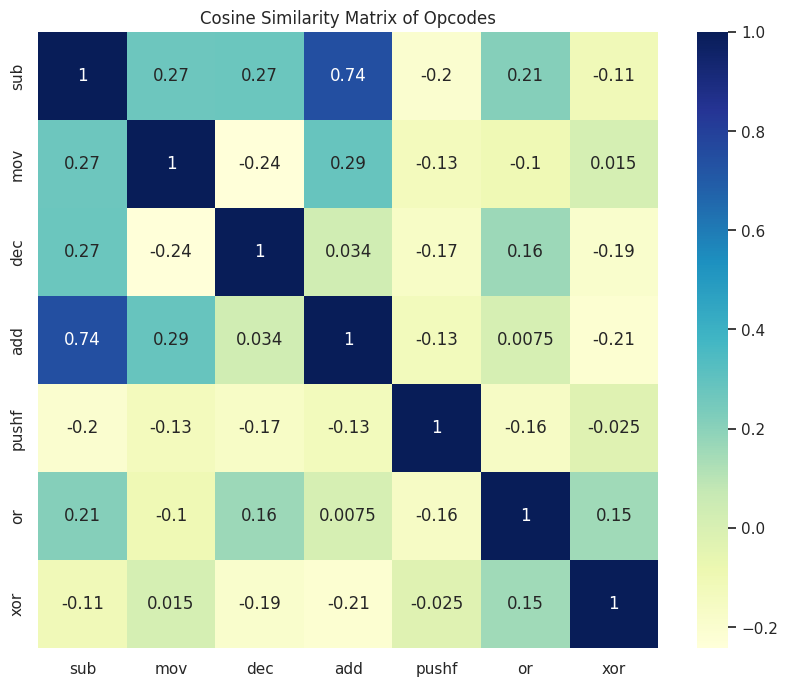

In [15]:
# Plotting the matrix as a heatmap
sns.set()  # Set seaborn styles
plt.figure(figsize=(10, 8))

# Customize the heatmap
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", xticklabels=opcodes, yticklabels=opcodes)

plt.title("Cosine Similarity Matrix of Opcodes")
plt.show()